In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [26]:
#load audio files with librosa
audio_file1='/Users/caomi/Documents/deep learning/audio signal processing/audio_files/Percussion/bass drum/bass-drum__phrase_mezzo-piano_rhythm.mp3'
audio_file2='/Users/caomi/Documents/deep learning/audio signal processing/audio_files/Strings/guitar/guitar_Gs3_very-long_forte_normal.mp3'
audio_file3='/Users/caomi/Documents/deep learning/audio signal processing/audio_files/Brass/trombone/trombone_Gs5_long_forte_vibrato.mp3'

audio_1, sr1 =librosa.load(audio_file1)
audio_2, sr2 =librosa.load(audio_file2)
audio_3, sr3 =librosa.load(audio_file3)

In [11]:
#extract RMSE with librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_audio1 = librosa.feature.rms(y=audio_1,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
rms_audio2 = librosa.feature.rms(y=audio_2,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
rms_audio3 = librosa.feature.rms(y=audio_3,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]

In [21]:
frames3=range(len(rms_audio3))
t3 = librosa.frames_to_time(frames3,hop_length=HOP_LENGTH)

frames2=range(len(rms_audio2))
t2 = librosa.frames_to_time(frames2,hop_length=HOP_LENGTH)

frames1=range(len(rms_audio1))
t1 = librosa.frames_to_time(frames1,hop_length=HOP_LENGTH)

t3.size,t2.size,t1.size

(86, 199, 653)

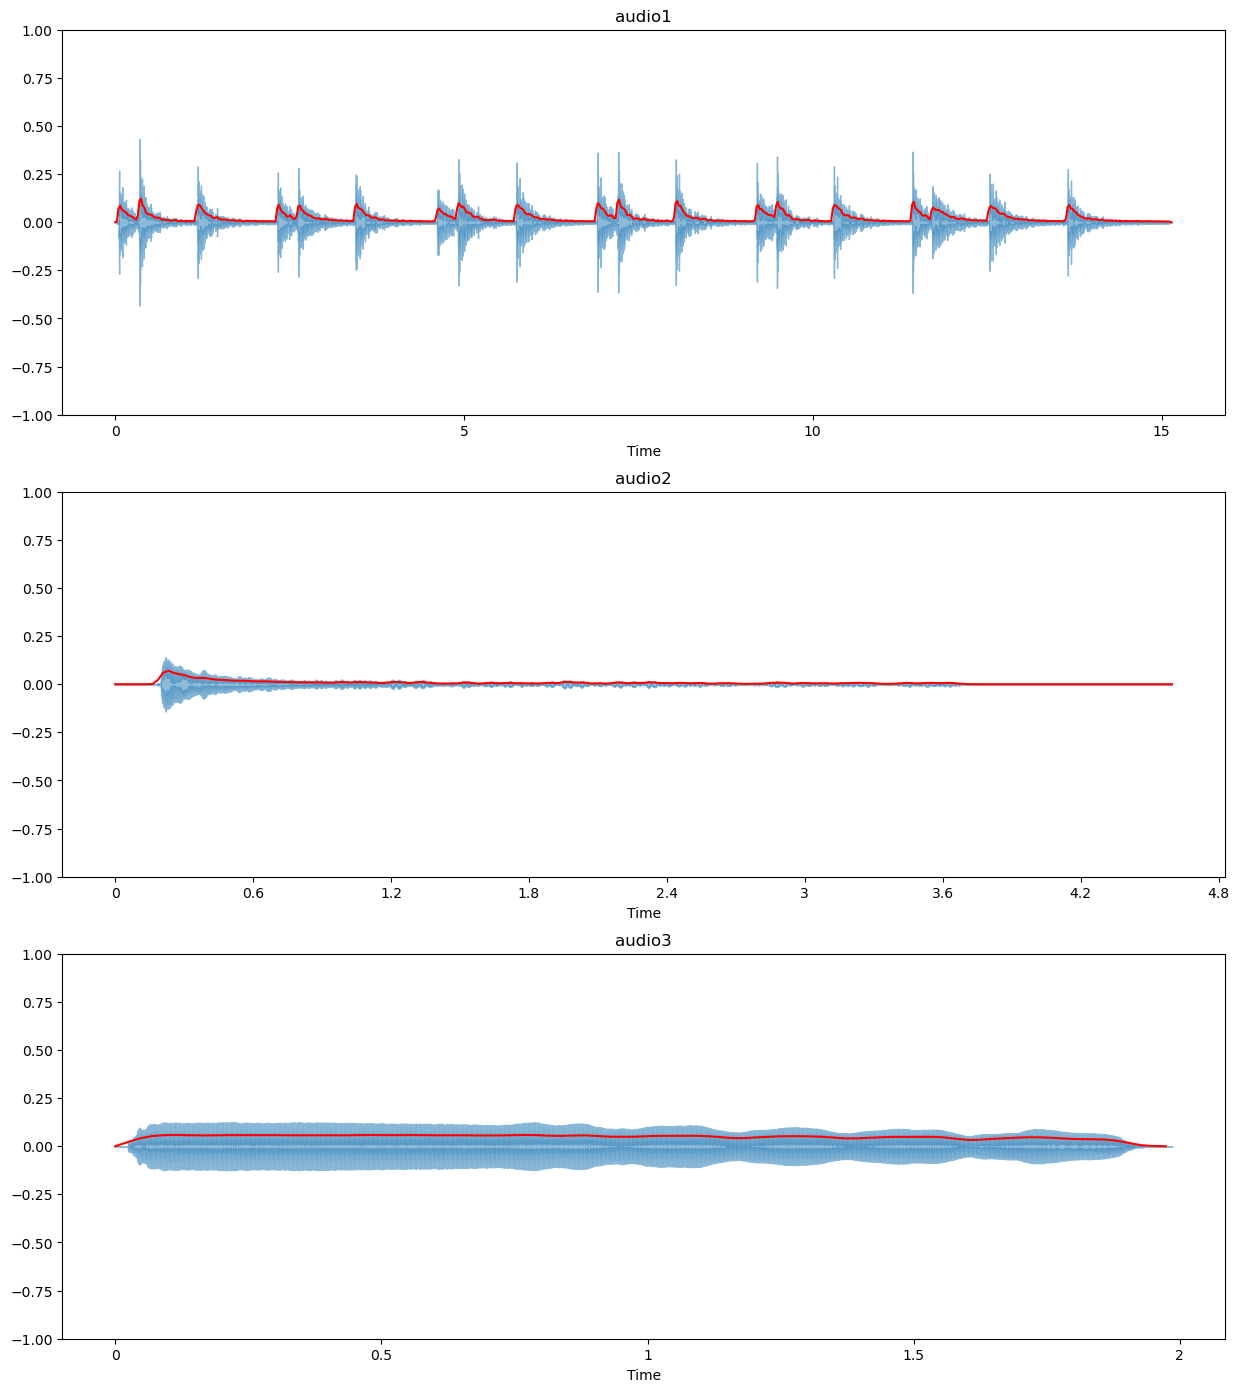

In [22]:
#plot the RMSE for all the music pieces
plt.figure(figsize=(15,17))


plt.subplot(3,1,1)
librosa.display.waveshow(audio_1,alpha=0.5)
plt.plot(t1,rms_audio1,color='r')
plt.title('audio1')
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveshow(audio_2,alpha=0.5)
plt.plot(t2,rms_audio2,color='r')

plt.title('audio2')
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveshow(audio_3,alpha=0.5)
plt.plot(t3,rms_audio3,color='r')

plt.title('audio3')
plt.ylim((-1,1))

plt.show()

In [38]:
def rms(signal, frames_length , hop_length):
    rms=[]
    
    for i in range(0,len(signal),hop_length):
        rms_current_frame=np.sqrt(np.sum(signal[i:i+frames_length]**2) / frames_length)
        rms.append(rms_current_frame)
    return np.array(rms)

In [62]:
RMS_1=rms(audio_1,FRAME_LENGTH,HOP_LENGTH)
RMS_2=rms(audio_2,FRAME_LENGTH,HOP_LENGTH)
RMS_2=np.append(RMS_2,0)
RMS_3=rms(audio_3,FRAME_LENGTH,HOP_LENGTH)

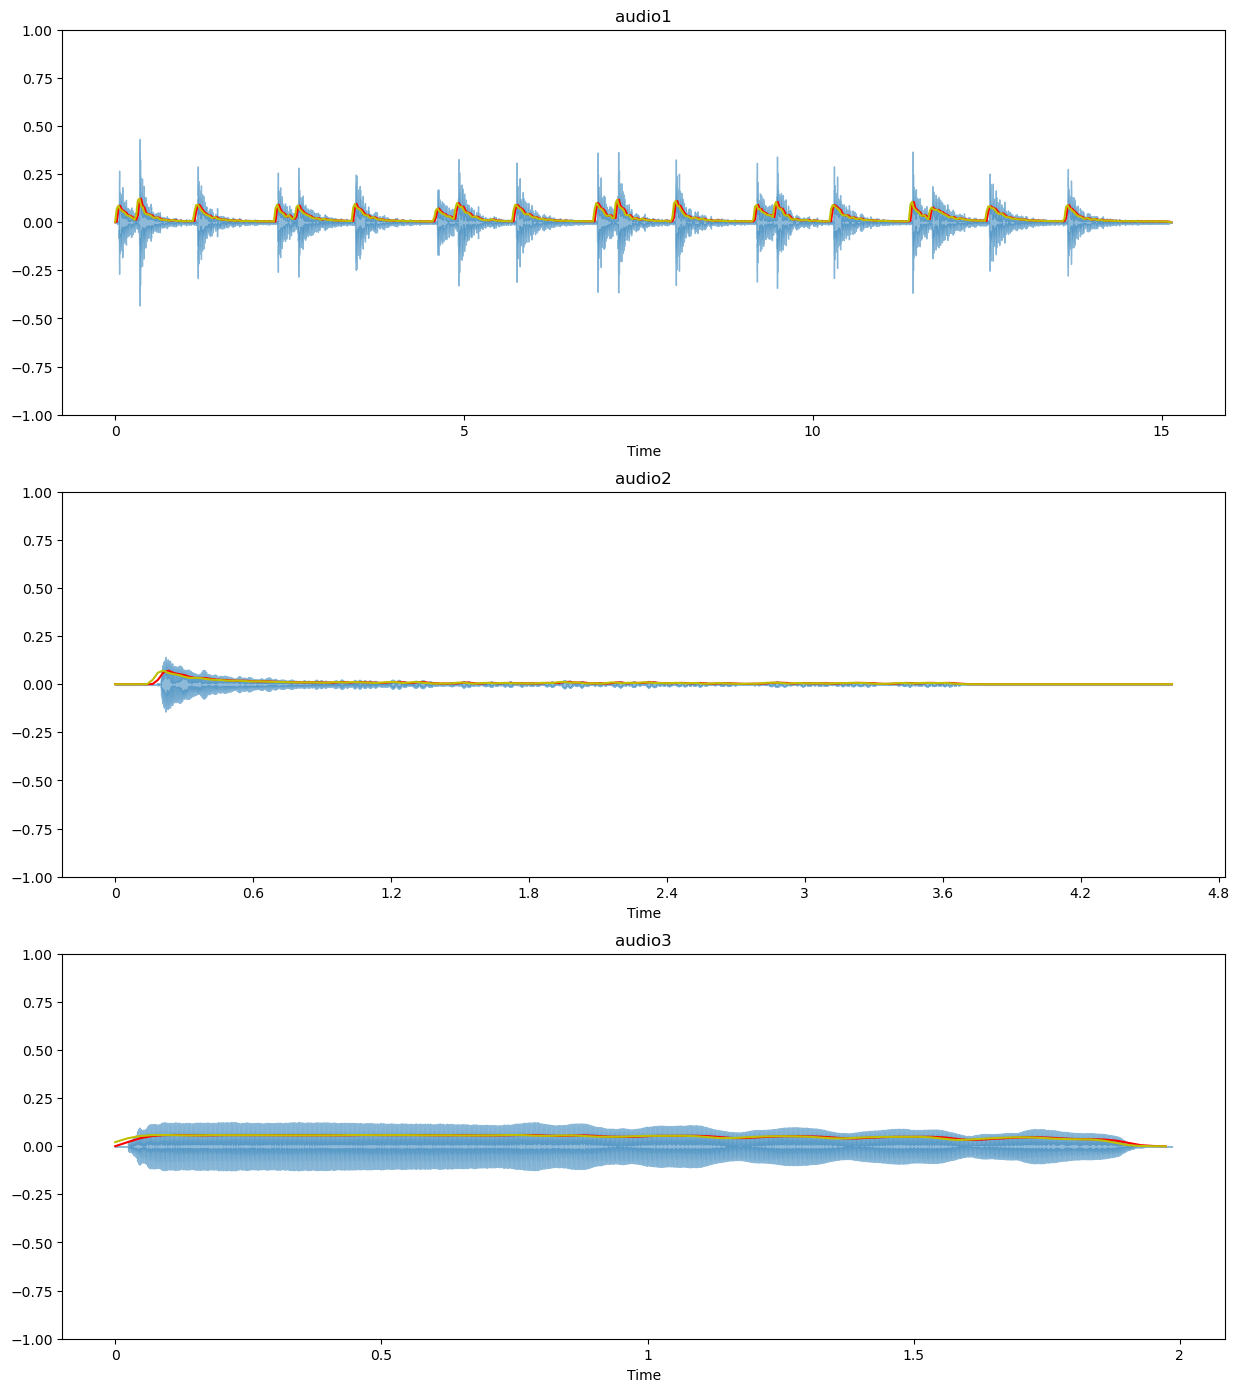

In [63]:
plt.figure(figsize=(15,17))


plt.subplot(3,1,1)
librosa.display.waveshow(audio_1,alpha=0.5)
plt.plot(t1,rms_audio1,color='r')
plt.plot(t1,RMS_1,color='y')
plt.title('audio1')
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveshow(audio_2,alpha=0.5)
plt.plot(t2,rms_audio2,color='r')
plt.plot(t2,RMS_2,color='y')
plt.title('audio2')
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveshow(audio_3,alpha=0.5)
plt.plot(t3,rms_audio3,color='r')
plt.plot(t3,RMS_3,color='y')
plt.title('audio3')
plt.ylim((-1,1))

plt.show()

In [64]:
# zero-crossing rate

zcr_audio1 = librosa.feature.zero_crossing_rate(y=audio_1,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
zcr_audio2 = librosa.feature.zero_crossing_rate(y=audio_2,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
zcr_audio3 = librosa.feature.zero_crossing_rate(y=audio_3,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]

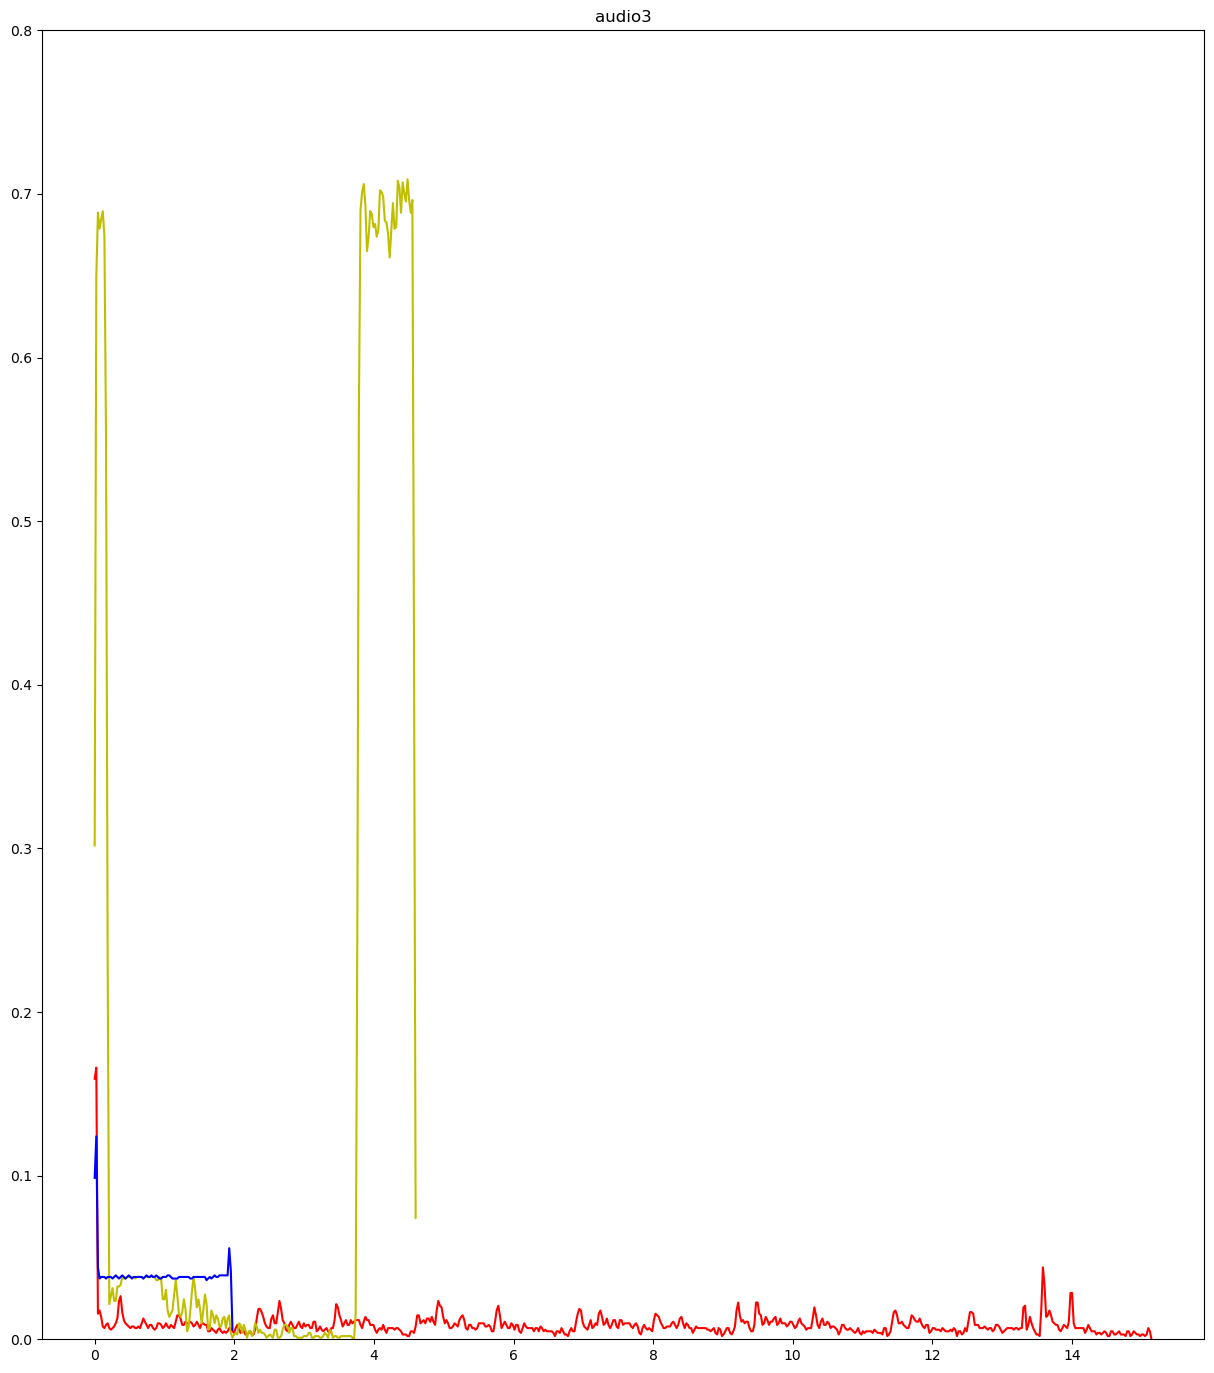

In [70]:
# visulise the ZCR for all the music pieces
plt.figure(figsize=(15,17))
plt.plot(t1,zcr_audio1,color='r')
plt.plot(t2,zcr_audio2,color='y')
plt.plot(t3,zcr_audio3,color='b')
plt.title('audio3')
plt.legend()
plt.ylim((0,0.8))

plt.show()

In [71]:
voice_file = '/Users/caomi/Documents/deep learning/audio signal processing/audio_files/welcome-to-the-bayou-81373.mp3'
noise_file = '/Users/caomi/Documents/deep learning/audio signal processing/audio_files/inside-car-noise-while-driving-29978.mp3'

In [72]:
voice, _ =librosa.load(voice_file)
noise, _ =librosa.load(noise_file,duration=11)

In [74]:
ipd.Audio(voice_file)

In [75]:
ipd.Audio(noise_file)

In [92]:
zcr_voice=librosa.feature.zero_crossing_rate(y=voice,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
zcr_noise=librosa.feature.zero_crossing_rate(y=noise,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]


In [94]:
frames_voice=range(len(zcr_voice))
t_voice=librosa.frames_to_time(frames_voice,hop_length=HOP_LENGTH)
frames_noise=range(len(zcr_noise))
t_noise=librosa.frames_to_time(frames_noise,hop_length=HOP_LENGTH)

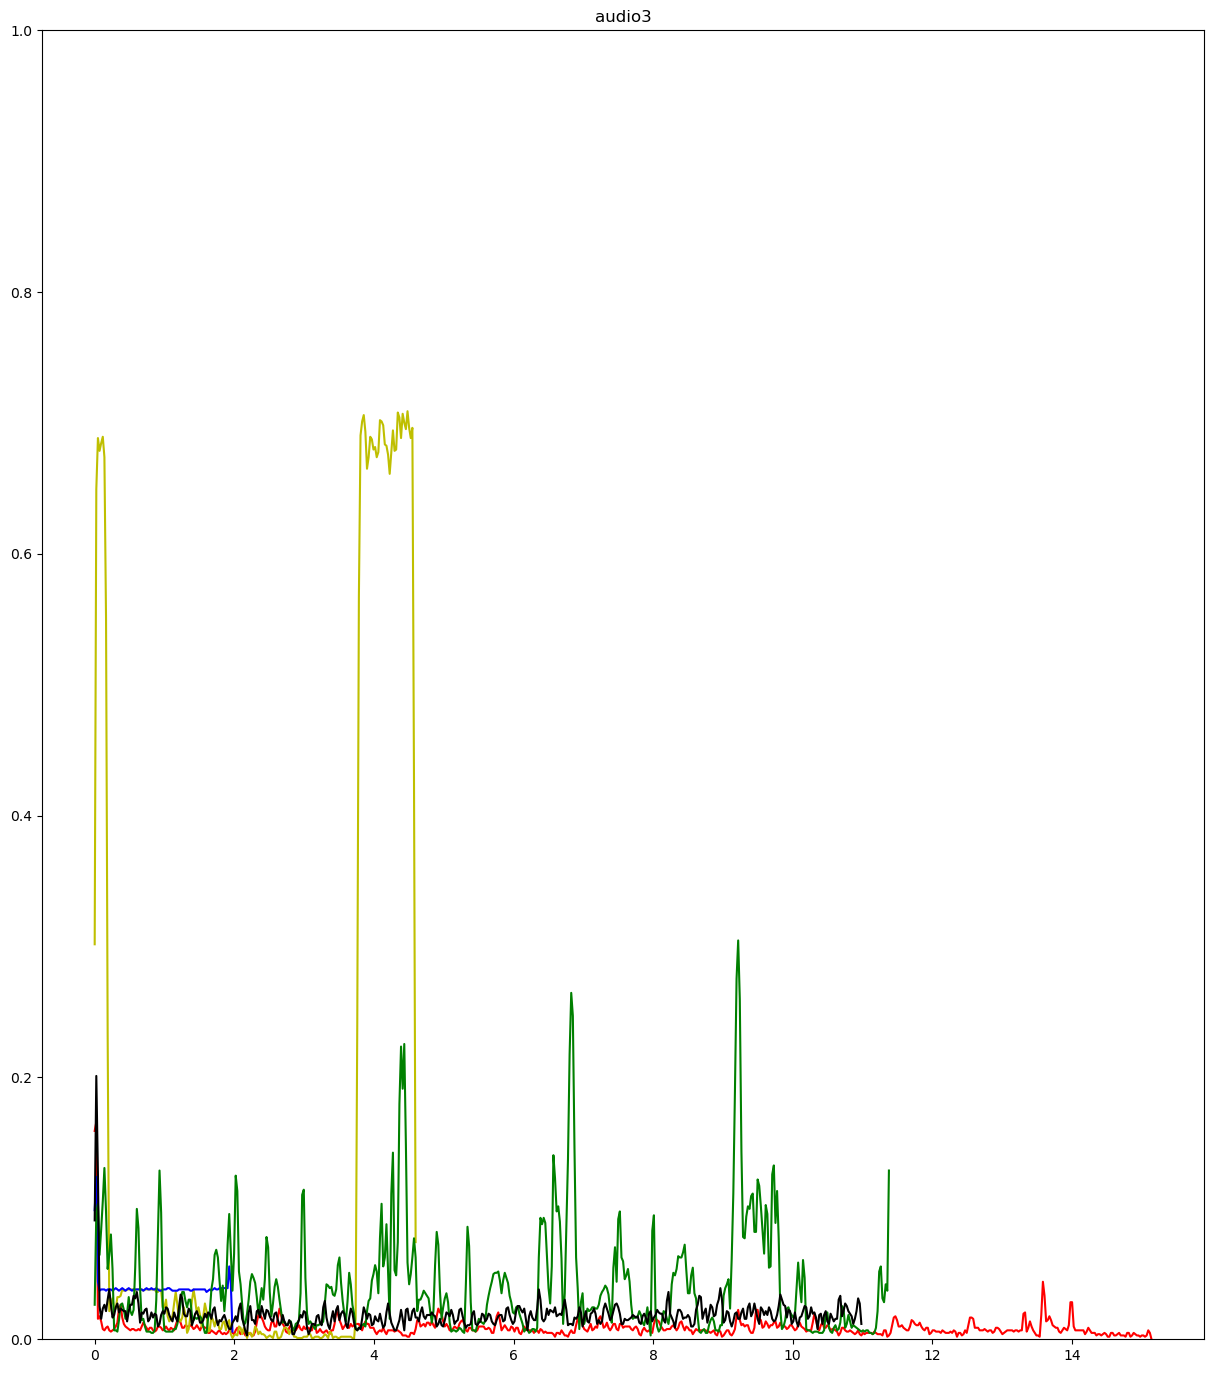

In [105]:
plt.figure(figsize=(15,17))
plt.plot(t1,zcr_audio1,color='r')
plt.plot(t2,zcr_audio2,color='y')
plt.plot(t3,zcr_audio3,color='b')
plt.plot(t_voice,zcr_voice,color='g')
plt.plot(t_noise,zcr_noise,color='black')
plt.title('audio3')
#plt.legend()
plt.ylim((0,1))

plt.show()